# Init
## Libraries

In [1]:
import numpy as np
from scipy.stats import cauchy
from scipy.special import wofz
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm.notebook import tqdm

%cd ..

d:\Projects\unetLineFinder


# Emission line profiles - Demos

## Gaussian

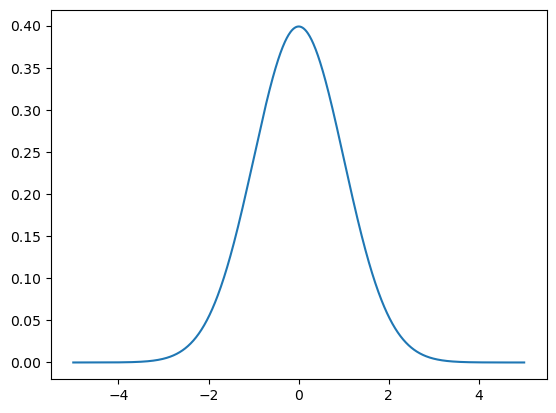

In [2]:
x = np.linspace(-5, 5, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

plt.plot(x, y)
plt.show()

## Lorentzian (Cauchy)

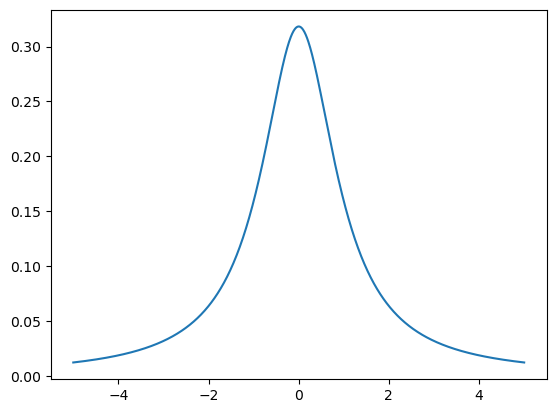

In [3]:
x = np.linspace(-5, 5, 1000)
y = cauchy.pdf(x, scale=1)

plt.plot(x, y)
plt.show()

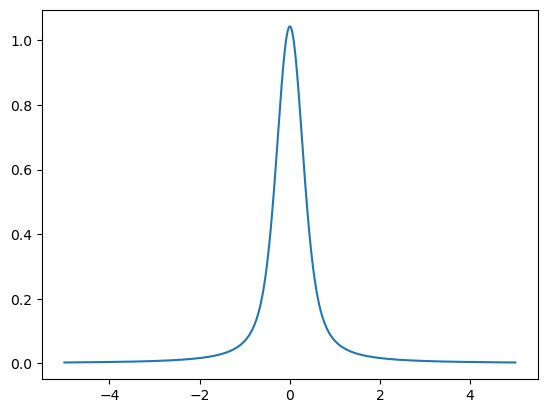

In [4]:
def voigt(x, sigma, gamma):
    z = (x + 1j*gamma)/(sigma*np.sqrt(2))
    return np.real(wofz(z))/(sigma*np.sqrt(2*np.pi))

x = np.linspace(-5, 5, 1000)
y = voigt(x, sigma=.2, gamma=.2)

plt.plot(x, y)
plt.show()

# Creating spectrum

In [5]:
from src.dataGeneration import *
# def generate_spectrum_with_profiles(
#     wavelengths: np.array,
#     line_count: int,
#     profile_widths: int
# ) -> tuple:
#     spectrum = np.zeros_like(wavelengths)
#     box_coordinates = []
#     line_maxima = []
#     for _ in range(line_count):
#         line_intensities = generate_random_profile(profile_widths)
#         profile_start = np.random.randint(1, len(spectrum) - len(line_intensities))
#         profile_box = get_line_boundaries(line_intensities)
#         box_coordinates.append(
#             profile_box[1] + profile_start
#         )
#         line_maxima.append(profile_box[0])
#         spectrum = add_profile_to_spectrum(
#             spectrum,
#             line_intensities,
#             shift=profile_start
#         )
#     return (spectrum, box_coordinates, line_maxima)

def modulate_spectrum_with_efficiency(
    spectrum: np.array,
) -> np.array:
    efficiency_profile = np.ones_like(spectrum)
    return spectrum * efficiency_profile

In [6]:
MEAN_LINE_COUNT = 250
PROFILE_RESOLUTION = 250
SPECTRUM_START = 400
SPECTRUM_END = 960
WVL_COUNT = 21500
SPECTRUM_COUNT = 200
wavelengths = np.linspace(SPECTRUM_START,SPECTRUM_END,WVL_COUNT)

train_data = []
for _ in tqdm(range(SPECTRUM_COUNT)):
    train_data.append(
        generate_spectrum_with_profiles(
            wavelengths=wavelengths,
            line_count=np.random.randint(MEAN_LINE_COUNT-50, MEAN_LINE_COUNT+50),
            profile_generator=ProfileGenerator(PROFILE_RESOLUTION)
        )
    )

x_train = np.vstack([x[0] for x in train_data])
y_train = np.vstack([x[1] for x in train_data]).astype(np.int16)
class_count = np.max(y_train) + 1
# y_train = np.eye(class_count)[y_train]

test_data = []
for _ in tqdm(range(SPECTRUM_COUNT)):
    test_data.append(
        generate_spectrum_with_profiles(
            wavelengths=wavelengths,
            line_count=np.random.randint(MEAN_LINE_COUNT-50, MEAN_LINE_COUNT+50),
            profile_generator=ProfileGenerator(PROFILE_RESOLUTION)
        )
    )

x_test = np.vstack([x[0] for x in test_data])
y_test = np.vstack([x[1] for x in test_data]).astype(np.int16)
# y_test = np.eye(class_count)[y_test]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [7]:
x_train = np.vstack([x[0] for x in train_data])
maxima_train = [x[2] for x in train_data]
y_train = np.vstack([x[1] for x in train_data])

In [18]:
DEMO_NDX = 1
demo_spectrum = x_train[DEMO_NDX,:]

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=wavelengths, 
        y=demo_spectrum,
        name='raw spectrum'
    )
)
fig.add_trace(
    go.Scatter(
        x=wavelengths, 
        y=y_train[DEMO_NDX,:] * np.max(maxima_train[DEMO_NDX]) / 3,
        name='ground truth'
    )
)
demo_spectrum = add_noise_to_spectrum(
    demo_spectrum,
    noise_std=np.median(maxima_train[DEMO_NDX]) / 10,
    noise_center=0
    # noise_center=np.mean(maxima_train[DEMO_NDX])
)
fig.add_trace(
    go.Scatter(
        x=wavelengths, 
        y=demo_spectrum,
        name='noisy spectrum'
    )
)
demo_spectrum = add_polynomial_baseline_to_spectrum(
    demo_spectrum,
    scaling_factor=np.mean(maxima_train[DEMO_NDX])
)
fig.add_trace(
    go.Scatter(
        x=wavelengths, 
        y=demo_spectrum,
        name='noisy spectrum with baseline'
    )
)
demo_spectrum = add_blackbody_continuum_to_spectrum(
    demo_spectrum,
    wavelengths=wavelengths,
    blackbody_temperature=12000,
    scaling_factor=np.mean(maxima_train[DEMO_NDX])
)
fig.add_trace(
    go.Scatter(
        x=wavelengths, 
        y=demo_spectrum,
        name='noisy spectrum with baseline and continuum'
    )
)
fig.add_trace(
    go.Scatter(
        x=wavelengths, 
        y=add_recombination_background_to_spectrum(demo_spectrum),
        name='blurred spectrum'
    )
)
fig.show()

175182.3249830711
231829.89356459555
188568.06103884283
131483.08037047833
162124.44825169528
207000.36564399578
183949.11903976818
189253.45143013142
210851.69542174356
166738.81316618095
183659.96000447788
168197.6250467704
215578.40429333705
196465.24560082893
217242.19046232218
194018.0261717505
164714.8140237766
203981.06843451102
167452.22869322557
183200.87923396195
192727.23378867275
189463.04406819737
174232.15781609114
208743.02789758306
172569.03568440033
252923.09924269532
172877.38941106352
178624.35246311617
179569.2979123918
198512.11509138695
188573.01600690224
196218.07691179082
182020.26856536692
206956.78593835153
201978.02921408377
190608.29212721527
231086.92989192603
181113.48682384705
242570.8369860454
187102.25551057205
220829.31064676034
173431.93875212866
173497.9360088508
233308.4046395053
203876.8832968014
188548.64073073177
213704.79053726958
175064.87955691956
186725.221148455
170555.5673432551
180619.66139229984
165545.89584072153
253211.6163353789
172243

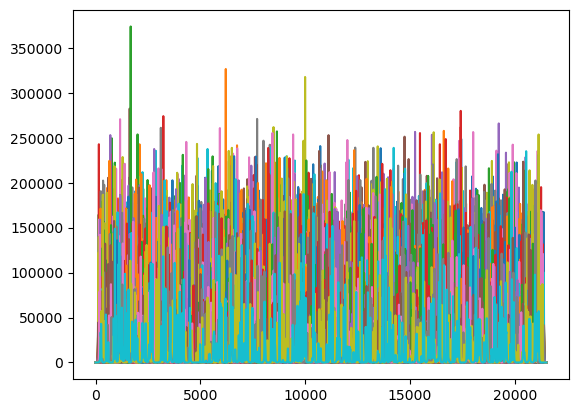

In [17]:
for spectrum, line_maxima in zip(x_train,maxima_train):
    plt.plot(spectrum)
    print(np.max(line_maxima))

In [ ]:
MIN_TEMPERATURE = 8000
MAX_TEMPERATURE = 20000

x_train_aug = []
for _ in tqdm(range(10)):
    x_train_aug.append(
        
    )

y_train
def augment_spectrum(spectrum: np.array) -> np.array:
    augmented_spectrum = add_noise_to_spectrum(
        spectrum,
        noise_std=np.median(maxima_train[DEMO_NDX]) / 10,
        noise_center=0    
    )
    augmented_spectrum = add_polynomial_baseline_to_spectrum(
        augmented_spectrum,
        scaling_factor=np.mean(maxima_train[DEMO_NDX])
    )
    augmented_spectrum = add_blackbody_continuum_to_spectrum(
        augmented_spectrum,
        wavelengths=wavelengths,
        blackbody_temperature=np.random.randint(MIN_TEMPERATURE,MAX_TEMPERATURE),
        scaling_factor=np.mean(maxima_train[DEMO_NDX])
    )
    add_recombination_background_to_spectrum(augmented_spectrum)
    augmented_spectrum -= np.min(augmented_spectrum)
    augmented_spectrum /= np.max(augmented_spectrum)
    return augmented_spectrum


In [ ]:
# boxes = list()
# for line_maximum, box_start, box_end in zip(line_maxima, box_starts, box_ends):
#     boxes.append(
#         go.layout.Shape(
#             type='rect',
#             x0=wavelengths[box_start],
#             x1=wavelengths[box_end],
#             y0=0,
#             y1=line_maximum * 1.2,
#             fillcolor='rgba(255, 0, 0, 0.2)', 
#             line=dict(
#                 width=2, 
#                 color='rgba(0, 0, 255, 1)'
#             )
#         )
#     )

# fig = go.Figure(
#     layout=go.Layout(shapes=boxes)
# )
# fig.add_trace(
#     go.Scatter(
#         x=wavelengths, 
#         y=spectrum
#     )
# )
# fig.show()